In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
data = pd.read_excel("E:\\data science\\assiments\\18\\CocaCola_Sales_Rawdata.xlsx")

### Data visualisation

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

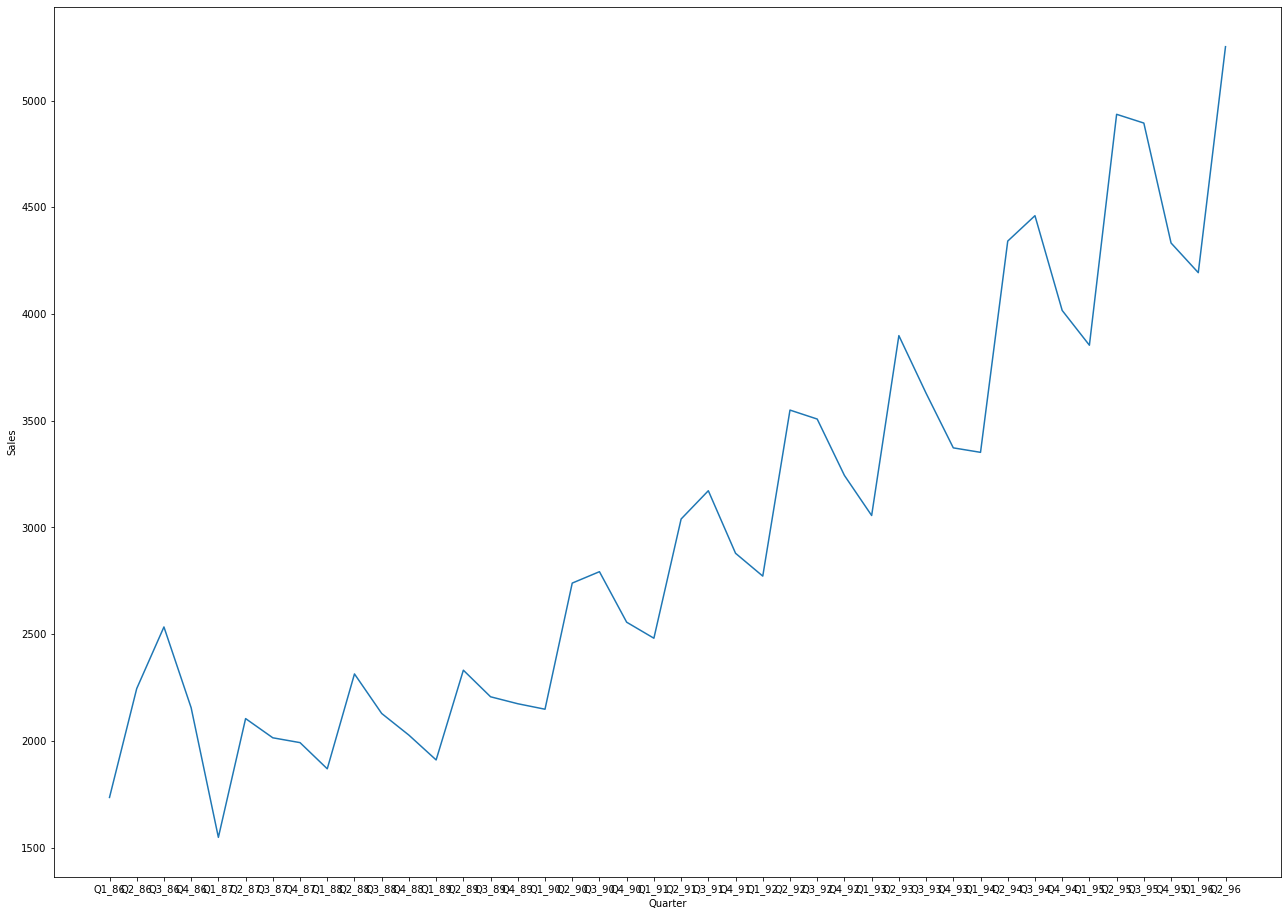

In [3]:
plt.figure(figsize=(22,16))
sns.lineplot(x="Quarter",y="Sales",data=data)

### Boxplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

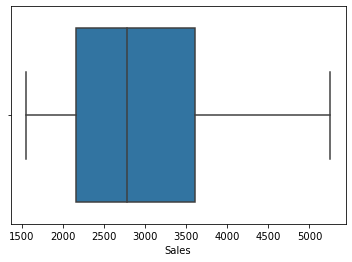

In [4]:
sns.boxplot("Sales",data=data)

### HIstogram

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

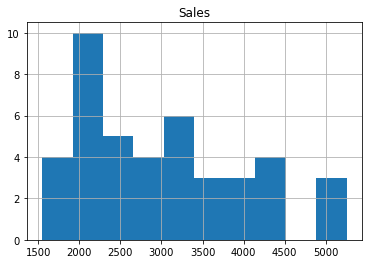

In [5]:
data.hist()

### Density plot

<AxesSubplot:ylabel='Density'>

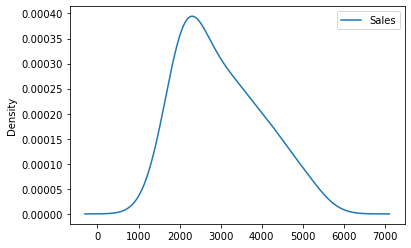

In [6]:
data.plot(kind='kde')

### Moving Average

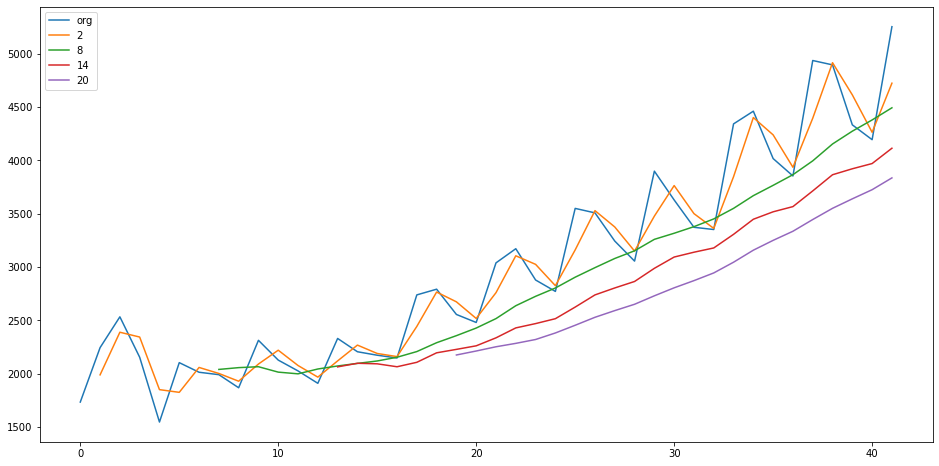

In [7]:
plt.figure(figsize=(16,8))
data.Sales.plot(label="org")
for i in range(2,24,6):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

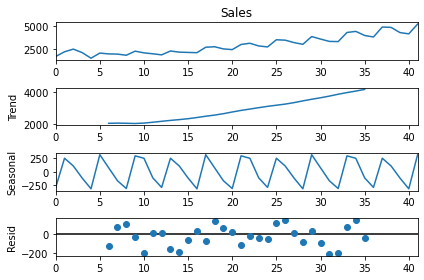

In [8]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

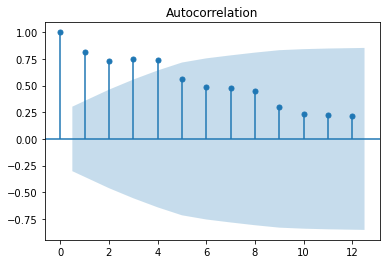

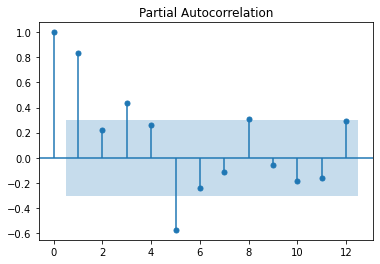

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

### Data Splitting

In [10]:
data.count()

Quarter    42
Sales      42
dtype: int64

In [11]:
train = data.head(30)
test = data.tail(12)

### Evaluation Metric MAPE

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [13]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.04676236654345

### Holt method

In [14]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

<ipython-input-14-6d1180ef4197>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213842042589699

### Holts winter exponential smoothing with additive seasonality and additive trend¶

In [22]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

4.842990713993034

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [28]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales) 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


4.317114568440716

### Final Model by combining train and test

In [29]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

### Forecasting next 10 

In [31]:
hwe_model_mul_add.forecast(10)

42    4929.518981
43    4617.207857
44    4554.562023
45    5771.731031
46    5811.328980
47    5234.365715
48    4984.651349
49    6267.521436
50    6175.886814
51    5636.491467
dtype: float64

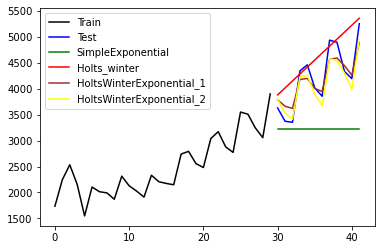

In [32]:
plt.plot(train.index, train["Sales"], label='Train',color="black")
plt.plot(test.index, test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')